### Business Understanding

The Seattle AirBnB Dataset contains data about AirBnB listings in Seattle, calendar availability for each of these listings as well as user reviews on the listings. Using this dataset, I am going to attempt to answer the following business questions:

1. When are the most common times where listings are available?
2. What are the factors affecting the price of a listing?
3. What is the typical discount for renting a house for a week or for a month?
4. What are the distribution of listing prices by neighborhoods?

### Data Understanding

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')

### Inspection of calendar dataset:

In [13]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [14]:
calendar.shape

(1393570, 4)

In [15]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [16]:
# Quick inspection of numerical values
calendar.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


### Inspection of reviews dataset:

In [17]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [18]:
print(reviews.shape)
reviews.info()

(84849, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


### Inspection of listings dataset:

In [19]:
listings.shape

(3818, 92)

In [20]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [21]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [22]:
# Display number of missing values in each column
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(listings.isna().sum().sort_values(ascending = False))

license                             3818
square_feet                         3721
monthly_price                       2301
security_deposit                    1952
weekly_price                        1809
notes                               1606
neighborhood_overview               1032
cleaning_fee                        1030
transit                              934
host_about                           859
host_acceptance_rate                 773
review_scores_accuracy               658
review_scores_checkin                658
review_scores_value                  656
review_scores_location               655
review_scores_cleanliness            653
review_scores_communication          651
review_scores_rating                 647
reviews_per_month                    627
first_review                         627
last_review                          627
space                                569
host_response_time                   523
host_response_rate                   523
neighbourhood   

In [23]:
# Checking values in experiences_offered
print(listings.experiences_offered.value_counts())

none    3818
Name: experiences_offered, dtype: int64


### Due to the presence of many columns, it will be very time-consuming to investigate every single one of them with their missing values. Therefore, I have selected some that I am particularly interested in. Those are: 
#### property type, accomodates, bathrooms, bedrooms, beds, bed type, amenities, price, weekly_price, monthly_price, minimum_nights, maximum_nights, number_of_reviews, host_listings_count.

In [24]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [25]:
listings.amenities

0       {TV,"Cable TV",Internet,"Wireless Internet","A...
1       {TV,Internet,"Wireless Internet",Kitchen,"Free...
2       {TV,"Cable TV",Internet,"Wireless Internet","A...
3       {Internet,"Wireless Internet",Kitchen,"Indoor ...
4       {TV,"Cable TV",Internet,"Wireless Internet",Ki...
                              ...                        
3813    {TV,"Cable TV",Internet,"Wireless Internet","A...
3814    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
3815    {"Cable TV","Wireless Internet",Kitchen,"Free ...
3816    {TV,"Wireless Internet",Kitchen,"Free Parking ...
3817    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
Name: amenities, Length: 3818, dtype: object

### Data Preparation
#### 1. Calendar

> Only price has missing values which are very likely to be because they are not available on the corresponding day. I can impute them with 0 but this could mean that they are free on these days so I will leave them as is to avoid misconceptions.
>
> Date column will be converted to datetime format and price to float
>
> Finally, false values in the available column will be replaced with 0s and trues with 1s to make the column easier to work with

In [26]:
calendar.price = calendar.price.str.replace('$', '', regex=True).replace(',', '', regex=True)
calendar['date'] =  pd.to_datetime(calendar['date'])
calendar['price'] = pd.to_numeric(calendar['price'])
calendar.replace({'available': {'f': 0, 't': 1}}, inplace = True)

In [27]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  int64         
 3   price       934542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 42.5 MB


In [28]:
calendar.describe()

,listing_id,available,price
count,1.393570e+06,1.393570e+06,934542.000000
mean,5.550111e+06,6.706100e-01,137.944859
std,2.962274e+06,4.699919e-01,105.062870
min,3.335000e+03,0.000000e+00,10.000000
25%,3.258213e+06,0.000000e+00,75.000000
50%,6.118244e+06,1.000000e+00,109.000000
75%,8.035212e+06,1.000000e+00,160.000000
max,1.034016e+07,1.000000e+00,1650.000000


#### 2. Reviews

> Only comments column has few missing values. My suggestion is to impute with something like "No Comment" since this might be an optional field that not everyone wants to fill.
>
> Also date column will be converted to datetime format

In [29]:
reviews["comments"].fillna("No Comment", inplace = True)
reviews['date'] =  pd.to_datetime(reviews['date'])

#### 3. Listings

> We can drop columns such as those with urls. Experiences_offered has no unique values, license and notes columns have many missing values so these can be dropped.

In [30]:
listings.drop(list(listings.filter(regex = 'url')), axis = 1, inplace = True)
listings.drop(['experiences_offered', 'license', 'notes'], axis = 1, inplace = True)

In [31]:
listings.shape

(3818, 81)

> Instead of having amenities shown as a dictionary of items, a better alternative is to have the count of amenities in the listing.
>
> Also the price columns are to be converted to numeric columns

In [32]:
# Create new amenities column which is the count of all amenities mentioned
f = lambda x: len(x["amenities"].split(','))
listings["amenities_num"] = listings.apply(f, axis=1)

In [33]:
# Remove $ sign and commas from the price columns
listings.price = listings.price.str.replace('$', '', regex=True).replace(',', '', regex=True)
listings.weekly_price = listings.weekly_price.str.replace('$', '', regex=True).replace(',', '', regex=True)
listings.monthly_price = listings.monthly_price.str.replace('$', '', regex=True).replace(',', '', regex=True)
listings[['price','weekly_price','monthly_price']] = listings[['price','weekly_price','monthly_price']].apply(pd.to_numeric)

#### Missing values: host_listings_count: 2, property_type: 1, bathrooms: 16, bedrooms: 6, beds: 1. 
####  I will fill host_listings_count & property_type with the mode of their values for simplicity, bathrooms with 0 (because you can get a bedroom with no bathroom) and drop the rows with missing bedrooms or beds as listings on AirBnB should always include any sort of bed.

In [34]:
listings['host_listings_count'].fillna(listings['host_listings_count'].mode()[0], inplace=True)
listings['property_type'].fillna(listings['property_type'].mode()[0], inplace=True)
listings['bathrooms'].fillna(0, inplace=True)
listings.dropna(subset=['bedrooms', 'beds'], inplace = True)

## Analyzing the Data & Answering questions

### Question 1: When are the most common times where listings are available?

In [35]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,1,85.0
1,241032,2016-01-05,1,85.0
2,241032,2016-01-06,0,NaN
3,241032,2016-01-07,0,NaN
4,241032,2016-01-08,0,NaN


In [36]:
calendar.available.value_counts()

1    934542
0    459028
Name: available, dtype: int64

In [37]:
# Check for any missing values in available column
np.sum(calendar.available.isna())

0

In [38]:
# Extract the month from the date column
calendar['month'] = pd.DatetimeIndex(calendar['date']).month
calendar.head()

,listing_id,date,available,price,month
0,241032,2016-01-04,1,85.0,1
1,241032,2016-01-05,1,85.0,1
2,241032,2016-01-06,0,NaN,1
3,241032,2016-01-07,0,NaN,1
4,241032,2016-01-08,0,NaN,1


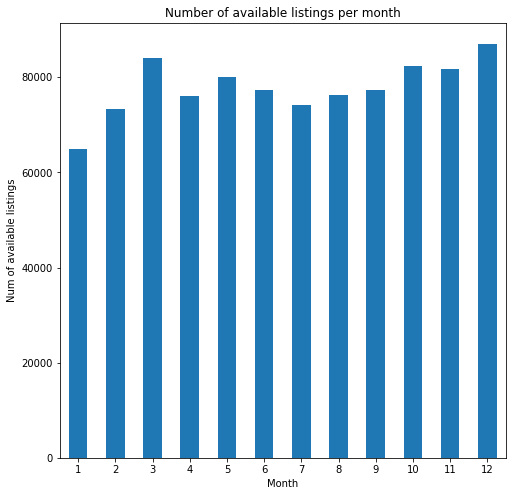

In [39]:
availability_by_month = calendar.groupby('month')['available'].sum()
plt.figure(figsize=(8,8));
availability_by_month.plot(kind='bar')
plt.xticks(rotation=360);
plt.title('Number of available listings per month');
plt.ylabel('Num of available listings');
plt.xlabel('Month');

> So we can see that listings December & March are more dominant. December might be because of Christmas. And January has the least listings.

> The next plot is just a different look at the same question. It shows how much of the month do the listings become available.

<Figure size 720x720 with 0 Axes>

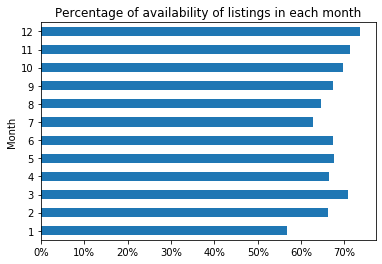

In [40]:
plt.figure(figsize=(10,10));
f, ax = plt.subplots()
(calendar.groupby('month')['available'].sum() / calendar.month.value_counts().sort_index()).plot(kind='barh');
plt.xticks(rotation=360);
plt.title('Percentage of availability of listings in each month');
ax.set_xticklabels(['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%']);
plt.ylabel('Month');

> So again we see that more than 70% of March & December have listings available and January only has just above 55% of it available listings.

### Question 2: What are the factors affecting the price of a listing?

In [41]:
# Making a correlation matrix for all variables and then check price specifically
corr_matrix = listings.corr()
corr1 = corr_matrix["price"].sort_values(ascending=False).iloc[:10]
corr1.to_frame().style.background_gradient(cmap='YlOrRd')

,price
price,1.000000
weekly_price,0.938284
monthly_price,0.873826
accommodates,0.652168
bedrooms,0.628117
beds,0.589634
square_feet,0.531752
bathrooms,0.513621
guests_included,0.393450
amenities_num,0.186633


> We can see that the number of people that a listing can accomodate, number of bedrooms and beds and bathrooms, the square_feet and the number of amenities all count for the price of a listing

### Question 3: What is the typical discount for renting a house for a week or for a month?

In [42]:
# Number of missing values in each of the weekly and monthly prices
print(np.sum(listings.weekly_price.isnull()))
print(np.sum(listings.monthly_price.isnull()))

1806
2296


> Since there are many missing values in the weekly and monthly prices, I will only use the rows with non-missing values in each of these 2 columns

In [43]:
non_missing_weekly = listings[listings['weekly_price'].notnull()]
non_missing_monthly = listings[listings['monthly_price'].notnull()]

#### I will create 2 columns that show the price difference between paying for a single night 7 or 30 times versus paying for the whole week or month price

In [44]:
non_missing_weekly['price_diff_for_week'] = (non_missing_weekly['price']*7) - non_missing_weekly['weekly_price']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
temp = non_missing_weekly[non_missing_weekly.price_diff_for_week < 0]
temp[['price', 'weekly_price']]

,price,weekly_price
6,80.0,575.0
11,99.0,800.0
27,45.0,360.0
36,348.0,2500.0
37,45.0,450.0
...,...,...
3789,60.0,500.0
3791,85.0,600.0
3794,107.0,1000.0
3804,125.0,888.0


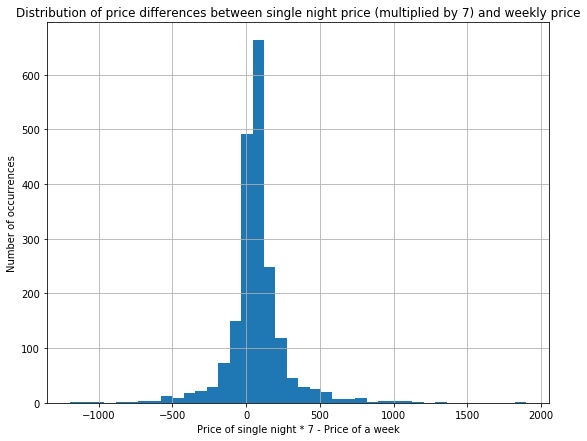

In [46]:
plt.figure(figsize=(9,7));
non_missing_weekly.price_diff_for_week.hist(bins = 40);
plt.xlabel('Price of single night * 7 - Price of a week')
plt.ylabel('Number of occurrences')
plt.title('Distribution of price differences between single night price (multiplied by 7) and weekly price');

> So surprisingly, we can see that it is not guaranteed that a person will save money by paying for a weekly price instead of paying 7 separate single nights. More than 30% of the time the person actually will end up paying more !

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


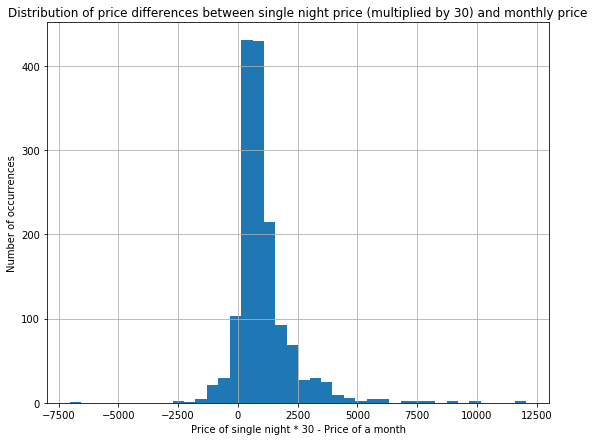

In [47]:
non_missing_monthly['price_diff_for_month'] = (non_missing_monthly['price']*30) - non_missing_monthly['monthly_price']
plt.figure(figsize=(9,7));
non_missing_monthly.price_diff_for_month.hist(bins = 40);
plt.xlabel('Price of single night * 30 - Price of a month')
plt.ylabel('Number of occurrences')
plt.title('Distribution of price differences between single night price (multiplied by 30) and monthly price');

> Here we can still see the same surprising observation that people might spend more by paying for a monthly price instead of paying for 30 separate nights. But at least here this is less frequent than with the weekly prices.

### Question 4: What are the distribution of listing prices by neighborhoods?

In [48]:
count_by_neighbourhood = listings.neighbourhood_group_cleansed.value_counts()

Text(0.5, 1.0, 'Number of listings per neighbourhood')

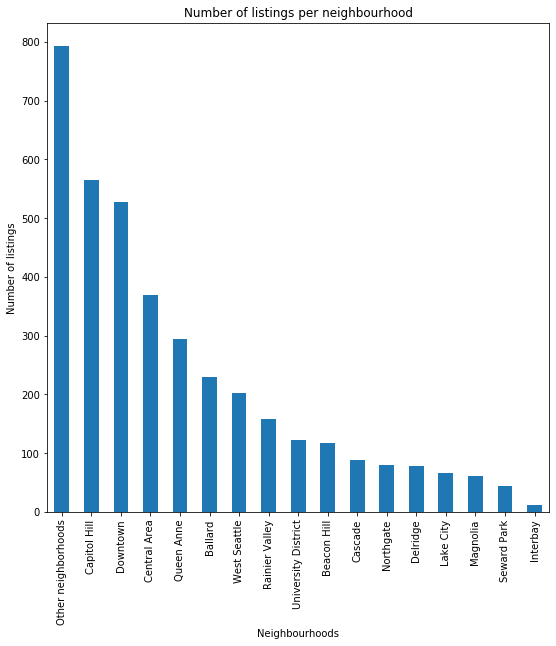

In [49]:
plt.figure(figsize = (9,9));
count_by_neighbourhood.plot(kind = 'bar');
plt.xlabel('Neighbourhoods');
plt.ylabel('Number of listings');
plt.title('Number of listings per neighbourhood')

Text(0.5, 1.0, "Average price per night in Seattle's neighbourhoods")

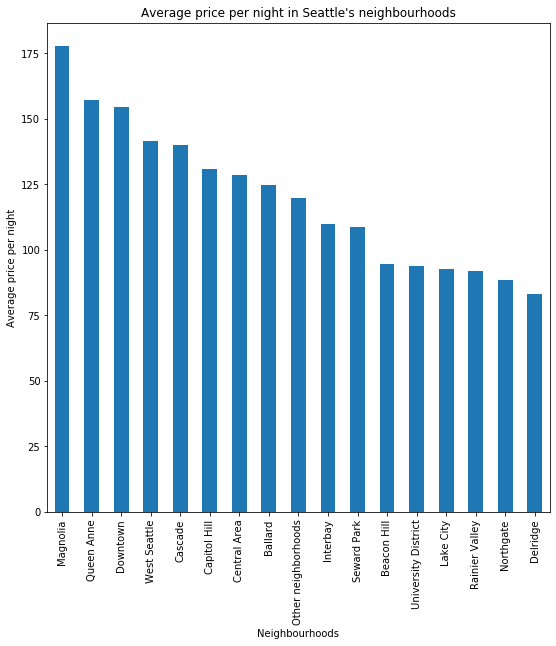

In [50]:
mean_price_per_neighbourhood = listings.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending = False)
plt.figure(figsize = (9,9));
mean_price_per_neighbourhood.plot(kind = 'bar');
plt.xlabel('Neighbourhoods');
plt.ylabel('Average price per night');
plt.title("Average price per night in Seattle's neighbourhoods")

> We can see that Magnolia has the highest average price per night (even though it is in the 3 lowest neighbourhoods in terms of number of listings) probably because it is by the ocean which raises the price significantly.